## HEAT CAPACITIES

### Methanol heat capacity

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_excel(r'C:\Users\20202055\OneDrive - TU Eindhoven\2023-2024\6P4X0\Python\Cp_methanol.xlsx')


In [2]:
#getting data from file and making fitted line
Temp_list = df['Temperature'].values.tolist()
Cp_list = df['Cp'].values.tolist()
Temp_c = [x-273.15 for x in Temp_list]
a_fit, b_fit, c_fit = np.polyfit(Temp_list, Cp_list, deg=2)

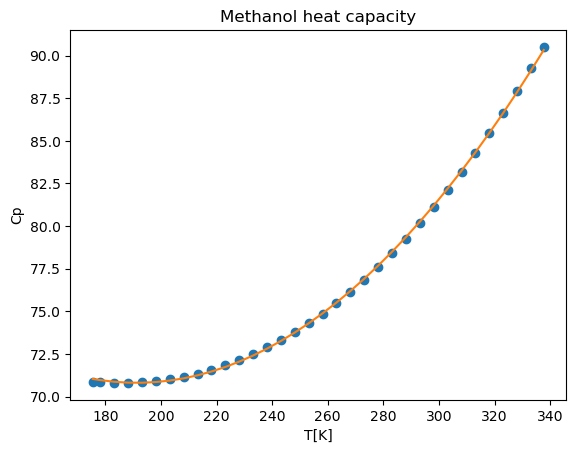

In [3]:
plt.plot(Temp_list, Cp_list, "o")
plt.plot(Temp_list, np.polyval((a_fit, b_fit, c_fit),Temp_list), "-")
plt.xlabel('T[K]') # label on the x axis
plt.ylabel('Cp') # label on the y axis
plt.title('Methanol heat capacity')
plt.show()

In [4]:
c = [a_fit,b_fit,c_fit] #Methanol heat capacity function parameters

### Isopropanol heat capacity

In [5]:
df2 = pd.read_excel(r'C:\Users\20202055\OneDrive - TU Eindhoven\2023-2024\6P4X0\Python\Cp_isopropanol.xlsx')
print(df2)

      Temp  Press     Cp  Temp_c
0   253.15    100  129.4   -20.0
1   258.15    100  130.6   -15.0
2   263.15    100  132.6   -10.0
3   268.15    100  135.0    -5.0
4   273.15    100  138.0     0.0
5   278.15    100  141.4     5.0
6   283.15    100  145.1    10.0
7   288.15    100  148.9    15.0
8   293.15    100  152.9    20.0
9   298.15    100  157.0    25.0
10  303.15    100  161.1    30.0
11  308.15    100  165.0    35.0
12  313.15    100  168.6    40.0
13  318.15    100  171.9    45.0
14  323.15    100  174.9    50.0


In [6]:
#getting data and making fitted line
Temp_2 = df2['Temp'].values.tolist()
Cp_2 = df2['Cp'].values.tolist()
a_2, b_2, c_2 = np.polyfit(Temp_2, Cp_2, deg=2)
Temps = np.linspace(-20, 85, 22)
Tempsk  = [x+273.15 for x in Temps]

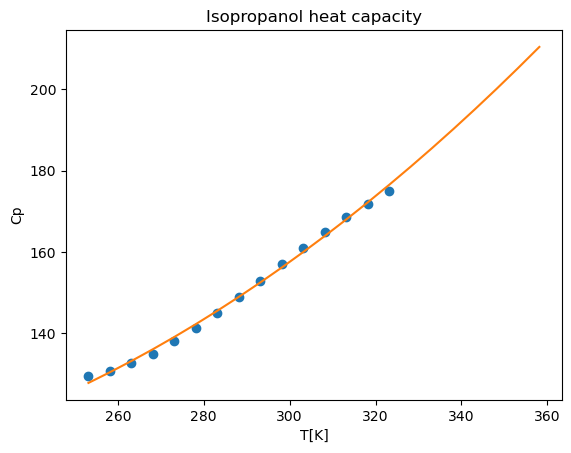

In [7]:
plt.plot(Temp_2, Cp_2, "o")
plt.plot(Tempsk, np.polyval((a_2, b_2, c_2), Tempsk), "-")
plt.xlabel('T[K]') # label on the x axis
plt.ylabel('Cp') # label on the y axis
plt.title('Isopropanol heat capacity')
plt.show()

In [8]:
c2 = [a_2, b_2, c_2] #Isopropanol heatcapacity function parameters
c2

[0.002612152553328984, -0.8092406593406348, 165.23556132675765]

## Getting Me_fraction From Calibration Curve

In [9]:
#Measurements
Me_ratios = [0, 0.1, 0.3, 0.5, 0.7, 0.9,1]
RI = [1.3765, 1.374, 1.369, 1.362, 1.3495, 1.342, 1.328]

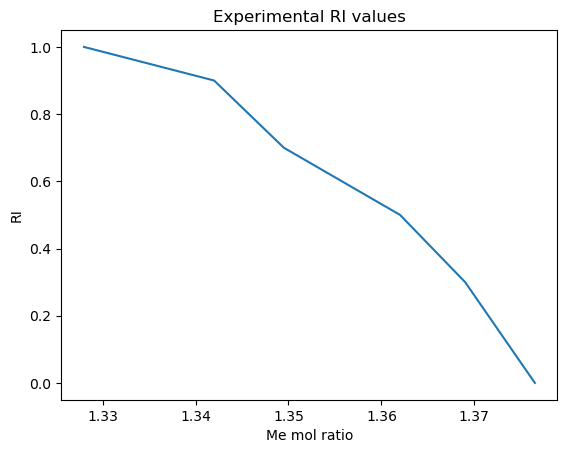

In [10]:
plt.plot(RI, Me_ratios)
plt.xlabel('Me mol ratio') # label on the x axis
plt.ylabel('RI') # label on the y axis
plt.title('Experimental RI values')
plt.show()

In [11]:
#fitting line at multiple degrees
Ca_fit, Cb_fit = np.polyfit(RI, Me_ratios, deg=1)
Ca_fit2, Cb_fit2, Cc_fit2 = np.polyfit(RI, Me_ratios, deg=2)

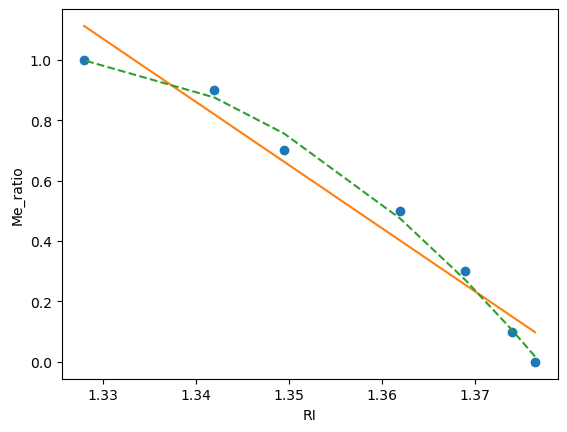

In [12]:
plt.plot(RI, Me_ratios,"o")
plt.plot(RI, np.polyval((Ca_fit, Cb_fit), RI),"-")
plt.plot(RI, np.polyval((Ca_fit2, Cb_fit2, Cc_fit2), RI), "--")
plt.xlabel("RI")
plt.ylabel("Me_ratio")
plt.show()

TA said it should be linear but deg=2 has a better fit

In [13]:
def Calibration(RI):
    Me_ratio = RI**2*Ca_fit2 + RI*Cb_fit2 + Cc_fit2
    return Me_ratio

### Insert RI or Me fraction here

In [14]:
#use calibration function to get the methanol fraction
Me_frac = Calibration(1.36)
print(Me_frac)

0.5264625833159471


#### probably unnecessary code down here

a = [x*Me_frac for x in c] #methanol fraction
b = [x*(1-Me_frac) for x in c2] #isopropanol fraction

a[0] = a[0]/3
a[1] = a[1]/2
b[0] = b[0]/4
b[1] = b[1]/3
b[2] = b[2]/2
print(a,b)

def line(a,b,T):
    dt  = (a[0]*T**3 + a[1]*T**2 + a[2]*T + b[0]*T**4 + b[1]*T**3 + b[2]*T**2 + b[3]*T)/2000
    return t

T = np.linspace(0,1000)
dt = line(a,b,T)
t2 = t*(dens_mix*V/Power)
plt.plot(T,t2)

#### end of the probably unnecessary code

## Road to the temperature ode

In [15]:
def Cp_iso(T):
    Cp_iso = c2[0] * T**2 + c2[1] *T + c2[2]
    return Cp_iso

In [16]:
def Cp_meth(T):
    Cp_meth = c[0] * T**2 + c[1] * T + c[2]
    return Cp_meth

In [17]:
def Cp_mix(n_meth, n_iso,T):
    Cp_mix = n_meth*Cp_meth(T) + n_iso*Cp_iso(T)
    return Cp_mix


In [18]:
T0 = 298 #K
V  = 0.01 #m3
n_meth = Me_frac #molfrac
n_iso = 1-Me_frac #molfrac
dens_meth = 792 #kg/m3
dens_iso = 786 #kg/m3
M_meth = 32.02 #g/mol
M_iso = 60.1 #g/mol
dens_mix = ((M_meth)/(M_iso+M_meth))*dens_meth + ((M_iso)/(M_iso+M_meth))*dens_iso
Power = 1500#J/s
params = {
    'n_meth': n_meth,    # Volumetric flow rate
    'V': V,    # Volume of each CSTR
    'n_iso': n_iso, # Inlet concentration
    'dens': dens_mix,
    'power': Power
}
print(params)

{'n_meth': 0.5264625833159471, 'V': 0.01, 'n_iso': 0.4735374166840529, 'dens': 788.0855405992186, 'power': 1500}


In [19]:
Cp_mix(Me_frac, 1-Me_frac, T0)

116.63535650361307

In [20]:
from scipy.integrate import odeint

def model(T,t, params):
    density = params['dens']
    V = params['V']
    n_meth = params['n_meth']
    n_iso = params['n_iso']
    power = params['power']
    dTdt = (power)/(Cp_mix(n_meth,n_iso,T)*V*density)
    return dTdt

In [21]:
t = np.linspace(0, 500)

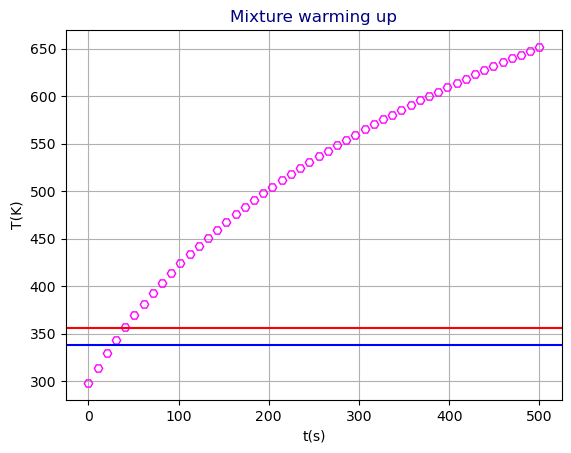

In [22]:
# Solve the ODE using odeint
y = odeint(model, T0, t, args=(params,))

plt.plot(t, y, "H", mfc='none', label='y(t) odeint', c="magenta")
plt.axhline(337.8, c="b")
plt.axhline(355.6, c="r")
plt.xlabel("t(s)")
plt.ylabel("T(K)")
plt.title("Mixture warming up", c="navy")
plt.grid(1)

In [23]:
y

array([[298.        ],
       [314.12277685],
       [329.24443635],
       [343.45349002],
       [356.83671944],
       [369.47507543],
       [381.44200464],
       [392.80309769],
       [403.61643603],
       [413.93323702],
       [423.79860267],
       [433.25226613],
       [442.32928705],
       [451.06066908],
       [459.47390344],
       [467.59343923],
       [475.44108733],
       [483.03636597],
       [490.39680148],
       [497.53816223],
       [504.4746988 ],
       [511.21931678],
       [517.78373862],
       [524.17864016],
       [530.41376981],
       [536.49805092],
       [542.43967193],
       [548.24616162],
       [553.9244603 ],
       [559.48097711],
       [564.9216446 ],
       [570.25196196],
       [575.47703873],
       [580.60162876],
       [585.63016342],
       [590.56678001],
       [595.41534676],
       [600.17948656],
       [604.86259674],
       [609.46786808],
       [613.99829879],
       [618.45671435],
       [622.8457765 ],
       [627